La neonata IASS (International Alliance for Safe Skies) ti ha incaricato di svolgere un'accurata analisi di tutti gli incidenti aerei che si sono verificati dal 1919 al 2023.

A tale scopo ti mette a disposizione un set di dati in cui sono registrati quasi 25.000 incidenti con le seguenti informazioni:

* **date**: data dell'incidente <br>
* **type**: tipo del velivolo <br>
* **registration**: codice di registrazione del velivolo <br>
* **operator**: operatore del velivolo <br>
* **fatalities**: numero di morti <br>
* **location**: luogo dell'incidente <br>
* **country**: nazione dell'incidente <br>
* **cat**: categoria dell'incidente come descritto dal ASN <br>

Utilizza i dati per portare alla luce, anche tramite grafici e visualizzazioni, utili insight.

**Esempi di Insight** <br>
Questi sono esempi di domande alla quale puoi trovare risposta tramite i dati, ma non limitarti a queste: svolgi un'analisi approfondita ponendoti ulteriori domande che pensi possano fornire insight utili:

* In quale nazione si sono verificati più incidenti?
* Gli incidenti avvengono più di frequentemente durante determinati giorni della settimana?
* Quali sono gli operatori più sicuri?
* Quale tipo di velivolo ha causato più morti?
* Come si sono evoluti gli incidenti dopo l'11 Settembre?

**Bonus** <br>
Crea un cartogramma che rappresenti il numero di incidenti per nazione.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pandas as pd
import geopandas as gpd

In [ ]:
BASE_URL = "https://raw.githubusercontent.com/MarcoRago97/Repository/refs/heads/main/progetto%20disastri%20aerei/"

database =  pd.read_csv(BASE_URL + "aviation-accidents.csv")
database.head(150)


,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown
...,...,...,...,...,...,...,...,...,...
145,25-JUN-1930,Ford 5-AT-A Tri-Motor,NC7739,Northwest Airways,0,Chicago Municipa...,USA,O1,1930
146,25-JUN-1930,Fokker F.10A,NC457E,Universal Airlines,0,"Chicago, IL",USA,O1,1930
147,25-JUN-1930,Fokker F.10A,NC879E,Universal Airlines,0,"Chicago, IL",USA,O1,1930
148,25-JUN-1930,Fokker F.10A,NC803E,Universal Airlines,0,"Chicago, IL",USA,O1,1930


In [ ]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          23967 non-null  object
 1   type          23967 non-null  object
 2   registration  22419 non-null  object
 3   operator      23963 non-null  object
 4   fatalities    20029 non-null  object
 5   location      23019 non-null  object
 6   country       23967 non-null  object
 7   cat           23967 non-null  object
 8   year          23967 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


In [ ]:
database.isnull().sum() # contiamo quanti valori null per le colonne

,0
date,0
type,0
registration,1548
operator,4
fatalities,3938
location,948
country,0
cat,0
year,0


In [ ]:
# Sostituzione dei valori nulli e aggiornamento diretto del DataFrame
database['fatalities'] = database['fatalities'].fillna(0)
database['operator'] = database['operator'].fillna('unknown operator')
database['location'] = database['location'].fillna('unknown location')
database['country'] = database['country'].fillna('unknown country')
database['registration'] = database['registration'].fillna('unknown registration')


In [ ]:
database.isnull().sum() # contiamo quanti valori null per le colonne

,0
date,0
type,0
registration,0
operator,0
fatalities,0
location,0
country,0
cat,0
year,0


**ANALISI DEGLI INCIDENTI NEL CORSO DEL TEMPO** - *Come si presentano gli incidenti nel corso degli anni?*

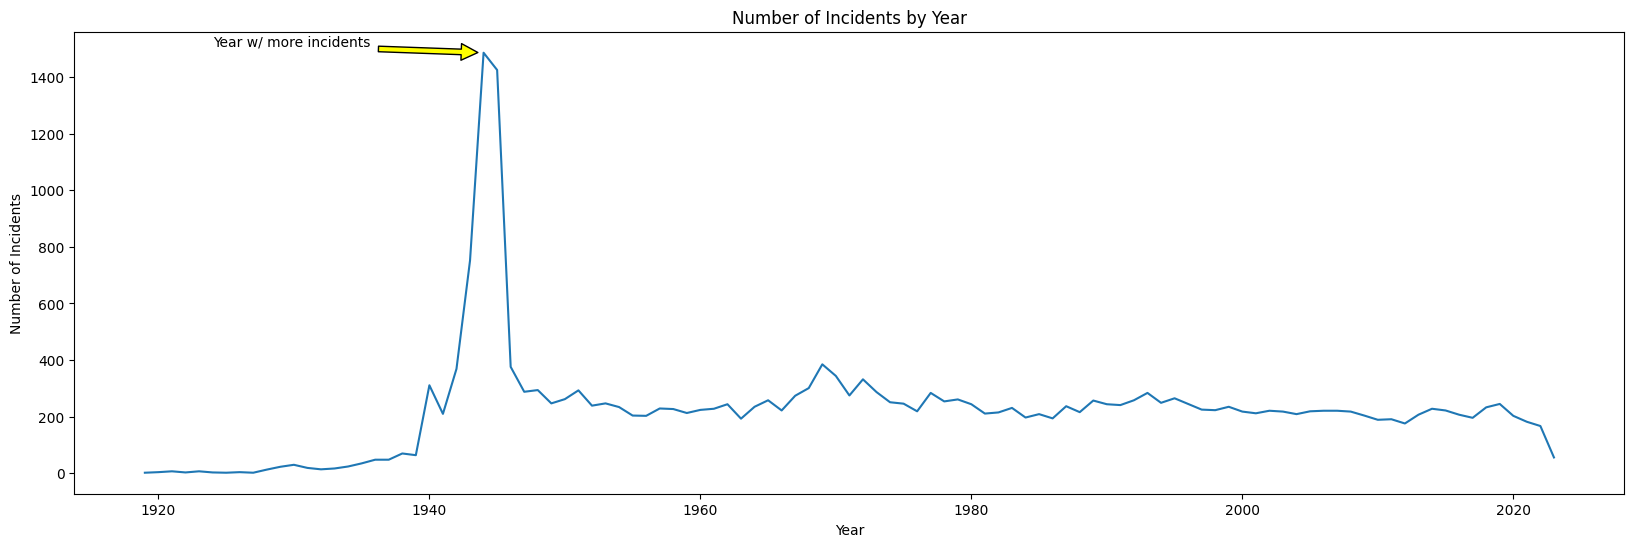

In [ ]:
year = pd.to_datetime(database['date'], errors='coerce').dt.year # convertiamo la colonna date in formato datetime, errors='coerce' mi serve per gestire le date che non possono essere trasformate
incidents_by_year = year.value_counts().sort_index() # contiamo il numero di incidenti per anno

max_year = incidents_by_year.idxmax() # otteniamo l'anno con il più alto numero di incidenti
max_incidents = incidents_by_year.max() # otteniamo il numero di incidenti per l'anno con il più alto numero di incidenti
# Creiamo il grafico

plt.figure(figsize=(20, 6))
plt.plot(incidents_by_year.index, incidents_by_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents by Year')
plt.annotate("Year w/ more incidents", xy=(max_year,max_incidents), xytext=(max_year-20,max_incidents+25), arrowprops=dict(facecolor="yellow", shrink=0.05))  # shrink controlla la lunghezza della freccia e posizionarla meglio
plt.show()

**ANALISI DEGLI INCIDENTI PER NAZIONI** - *In quale nazione si sono verificati più incidenti?*

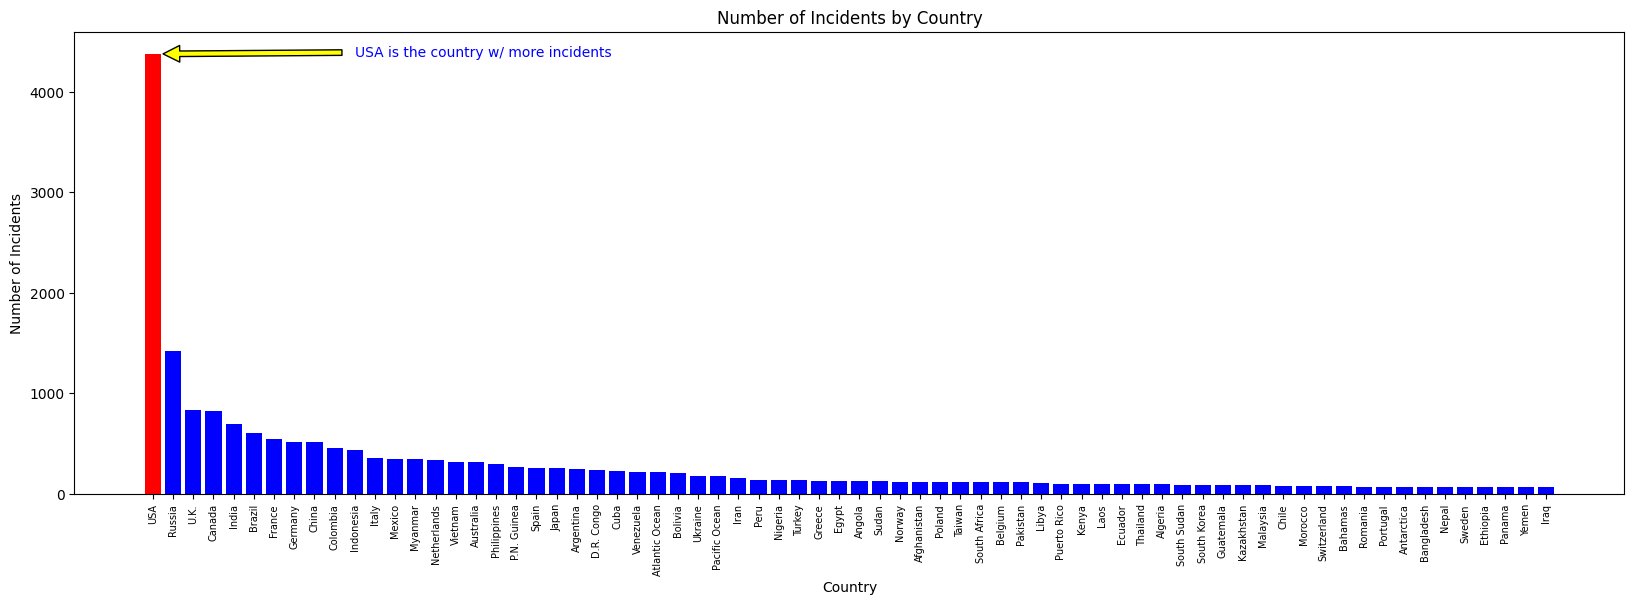

In [ ]:
database_country_dropped = database.dropna(subset=['country']) # eliminiamo le righe con valori nulli nella colonna country
database_country_dropped = database_country_dropped[database_country_dropped['country'] != 'Unknown country'] # eliminiamo le righe con valori 'unknown country' nella colonna country

incidents_by_country = database_country_dropped['country'].value_counts().head(70) # contiamo il numero di incidenti per country

max_country = incidents_by_country.idxmax() # otteniamo la nazione con il più alto numero di incidenti (però in questo caso è una stringa invece a noi serve la coordinata)
max_country_index = incidents_by_country.index.get_loc(max_country) # otteniamo l'indice della nazione con il più alto numero di incidenti
max_incidents = incidents_by_country.max() # otteniamo il numero di incidenti per la nazione con il più alto numero di incidenti

colors = ['red' if country == 'USA' else 'blue' for country in incidents_by_country.index ]

# Creiamo il grafico

plt.figure(figsize=(20, 6))
plt.bar(incidents_by_country.index, incidents_by_country.values, color=colors)
plt.xlabel('Country')
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents by Country')
plt.xticks(rotation=90, fontsize=7)
plt.annotate("USA is the country w/ more incidents", xy=(max_country_index,max_incidents), xytext=(max_country_index+10,max_incidents-25), arrowprops=dict(facecolor="yellow", shrink=0.05), color='blue')
plt.show()

**ANALISI INCIDENTI DURANTE I GIORNI DELLA SETTIMANA** - *Gli incidenti si manifestano più frequentemente durante certi giorni della settimana?*

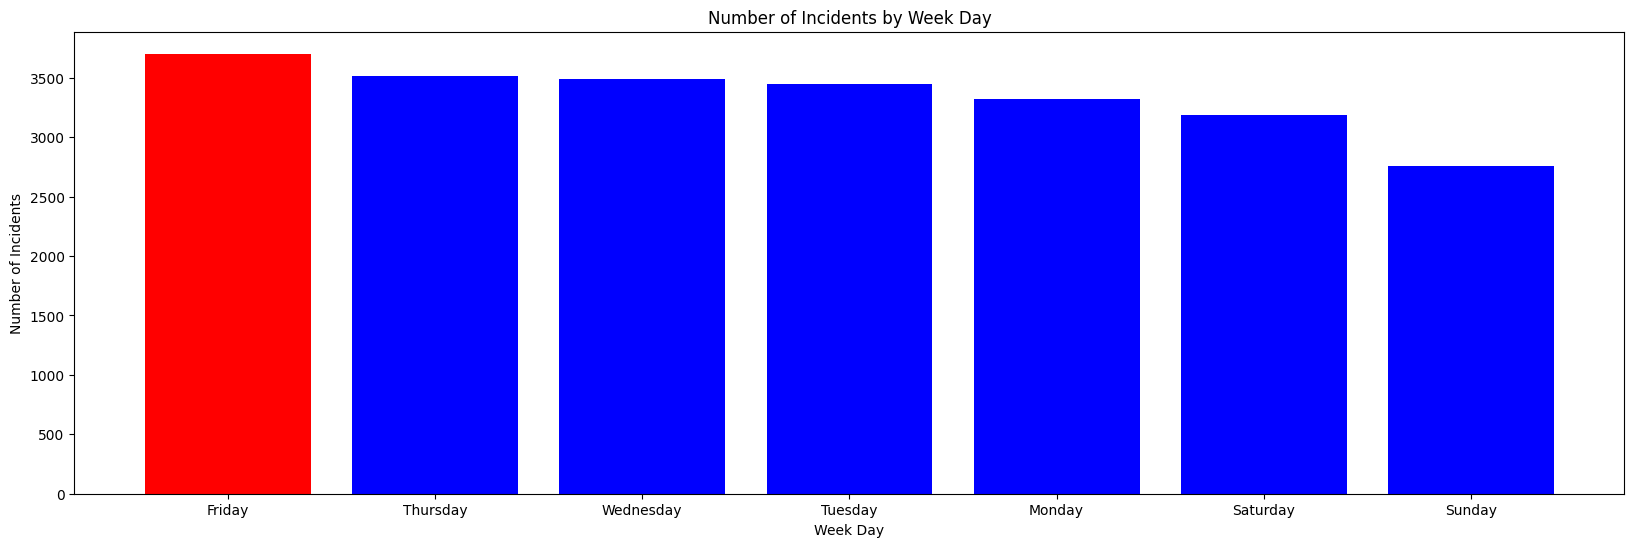

In [ ]:
week_day = pd.to_datetime(database['date'], errors='coerce').dt.day_name() # convertiamo la colonna date in formato datetime, errors='coerce' mi serve per gestire le date che non possono essere trasformate
incidents_by_week_day = week_day.value_counts()

colors = ['red' if day == 'Friday' else 'blue' for day in incidents_by_week_day.index ]

#creiamo il grafico

plt.figure(figsize=(20, 6))
colors = colors
plt.bar(incidents_by_week_day.index, incidents_by_week_day.values, color=colors)
plt.xlabel('Week Day')
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents by Week Day')
plt.show()


**ANALISI INCIDENTI PER ANNO** - *Qual'è l'anno che ha avuto più incidenti*

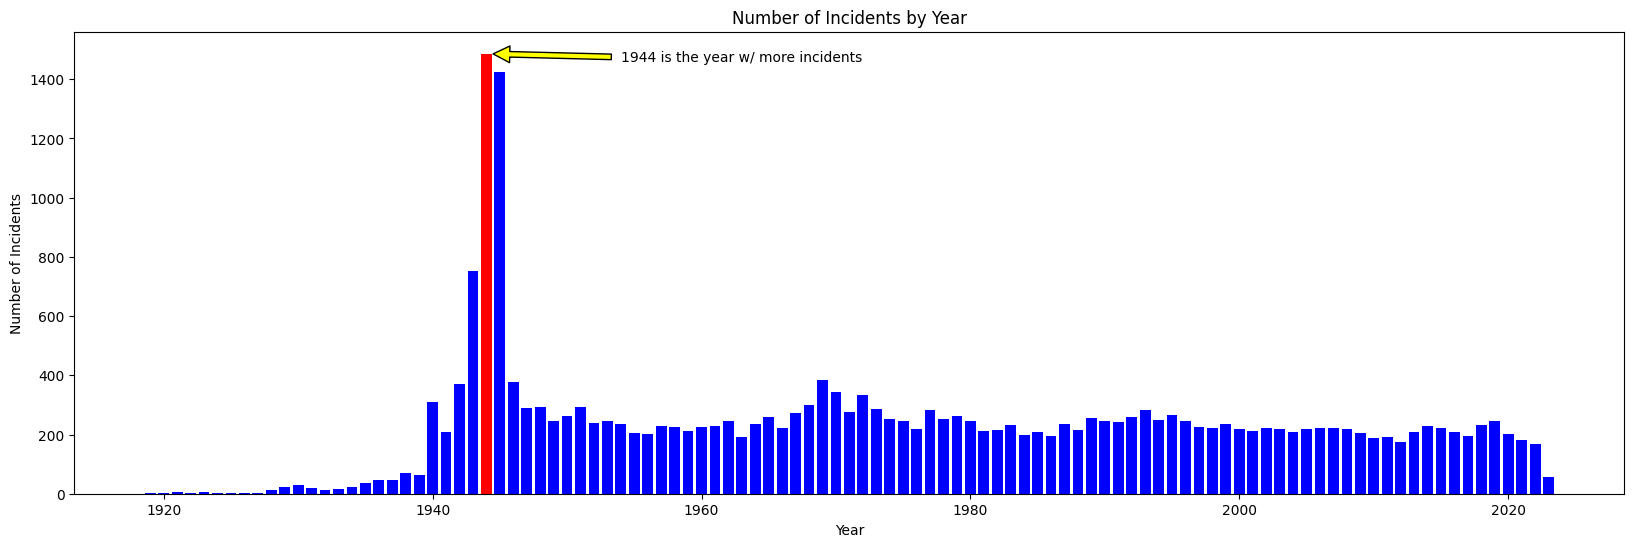

In [ ]:
# convertiamo la colonna date in formato datetime, errors='coerce' mi serve per gestire le date che non possono essere trasformate
date = pd.to_datetime(database['date'], errors='coerce')
# Estriamo l'anno dalla data
year = date.dt.year

# contiamo il numero di incidenti per anno
incidents_by_year = year.value_counts()

# otteniamo l'anno con il più alto numero di incidenti
max_year = incidents_by_year.idxmax()
max_incidents = incidents_by_year.max()

colors = ['red' if year == 1944 else 'blue' for year in incidents_by_year.index] # perchè .index? perchè year è una serie, quindi la condizione year==1944 è una serie booleana, che non può fare una condizone, perciò prendiamo l'index

#creiamo il grafico

plt.figure(figsize=(20, 6))
plt.bar(incidents_by_year.index, incidents_by_year.values, color=colors)
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents by Year')
plt.annotate("1944 is the year w/ more incidents", xy=(max_year,max_incidents), xytext=(max_year+10,max_incidents-25), arrowprops=dict(facecolor="yellow", shrink=0.05))
plt.show()

**ANALISI INCIDENTI PER TIPO DI AEREO** - *Quali sono i modelli di aereo che hanno dimostaro essere meno affidabili?*

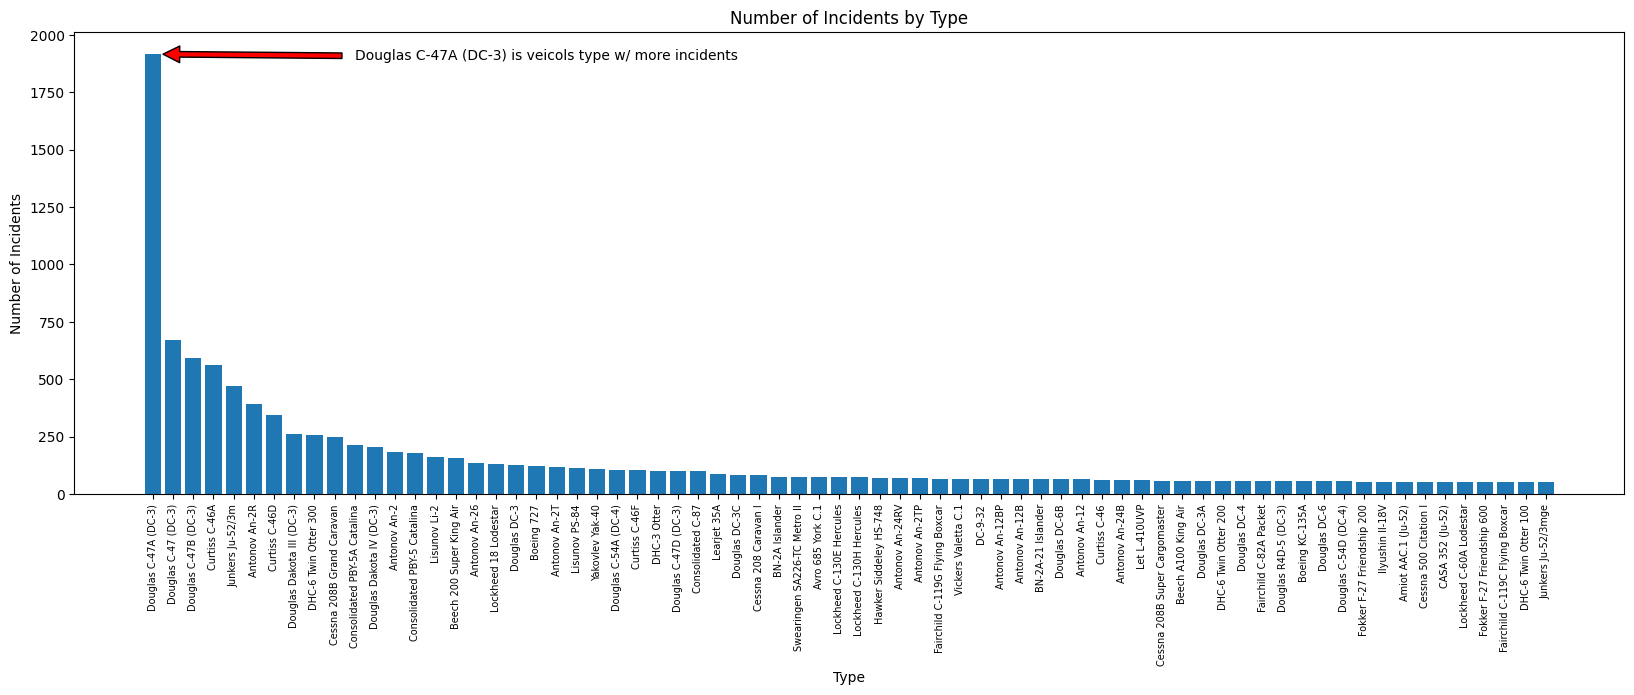

In [ ]:
veicols_type = database['type'].value_counts().head(70)

max_veicols_type = veicols_type.idxmax() # otteniamo il tipo di aereo con il più alto numero di incidenti (però in questo caso è una stringa invece a noi serve la coordinata)
max_veicols_index = veicols_type.index.get_loc(max_veicols_type) # otteniamo l'indice della nazione con il più alto numero di incidenti
max_incidents = veicols_type.max() # otteniamo il numero di incidenti per la nazione con il più alto numero di incidenti

plt.figure(figsize=(20, 6))
plt.bar(veicols_type.index, veicols_type.values)
plt.xlabel('Type')
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents by Type')
plt.xticks(rotation=90, fontsize=7)
plt.annotate("Douglas C-47A (DC-3) is veicols type w/ more incidents", xy=(max_veicols_index,max_incidents), xytext=(max_veicols_index+10,max_incidents-25), arrowprops=dict(facecolor="red", shrink=0.05))
plt.show()

**ANALISI INCIDENTI PER OPERATORE** - *Quali sono stati gli operatori più sicuri?*

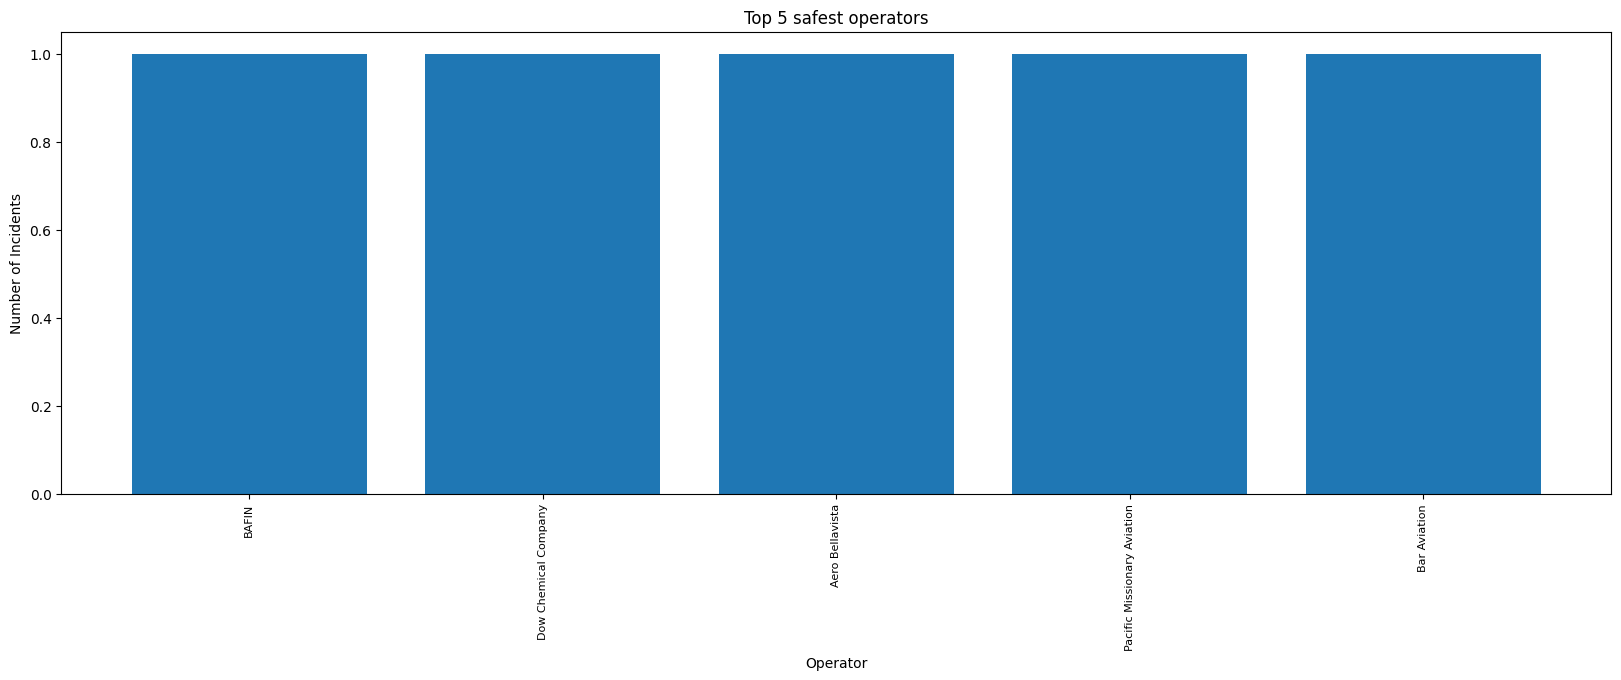

In [ ]:
operators = database['operator'].value_counts().tail()
plt.figure(figsize=(20, 6))
plt.bar(operators.index, operators.values)
plt.xlabel('Operator')
plt.ylabel('Number of Incidents')
plt.title('Top 5 safest operators')
plt.xticks(rotation=90, fontsize=8)
plt.show()

**ANALISI DEGLI INCIDENTI MORTALI PER ANNO** - *Quali sono stati gli anni con più incidenti mortali?*

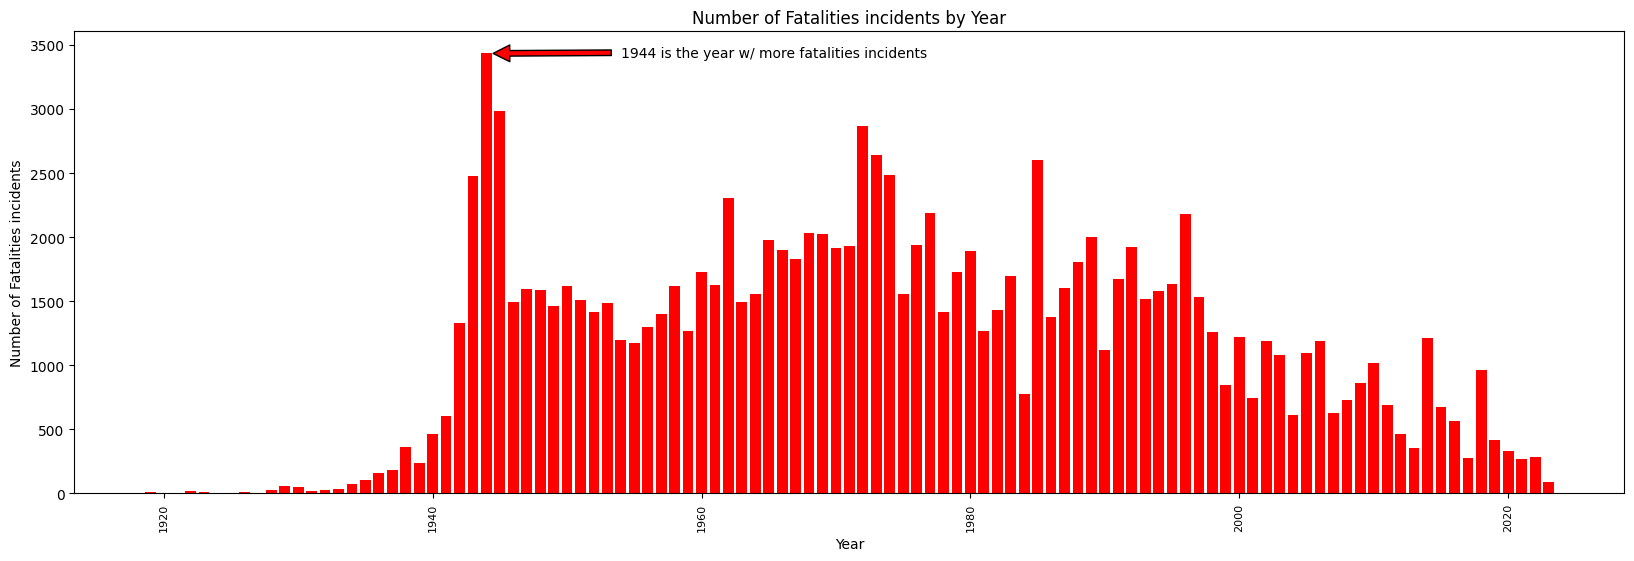

In [ ]:

database['fatalities'] = pd.to_numeric(database['fatalities'], errors='coerce') # convertiamo la colonna fatalities in formato numerico
database['year'] = pd.to_datetime(database['date'], errors='coerce').dt.year # convertiamo la colonna date in formato datetime, errors='coerce' mi serve per gestire le date che non possono essere trasformate
database_year_dropped = database.dropna(subset=['year']) # eliminiamo le righe con valori nulli nella colonna year (levialo l'anno 'unknown')

# Raggruppiamo per anno e sommiamo il numero di vittime per ogni anno
fatalities_incident_by_year = database_year_dropped.groupby('year')['fatalities'].sum()

max_year = fatalities_incident_by_year.idxmax()
max_incidents = fatalities_incident_by_year.max()


# Creazione del grafico
plt.figure(figsize=(20, 6))
plt.bar(fatalities_incident_by_year.index, fatalities_incident_by_year.values, color='red')
plt.xlabel('Year')  # L'asse x rappresenta l'anno
plt.ylabel('Number of Fatalities incidents')  # L'asse y rappresenta il numero di morti
plt.title('Number of Fatalities incidents by Year')

# Definiamo gli scaglioni per l'asse y
max_fatalities = fatalities_incident_by_year.max()  # Trova il valore massimo per l'asse y
scaglioni_y = np.arange(0, max_fatalities + 500, 500)  # Scaglioni ogni 500 unità

plt.annotate("1944 is the year w/ more fatalities incidents", xy=(max_year,max_incidents), xytext=(max_year+10,max_incidents-25), arrowprops=dict(facecolor="red", shrink=0.05))

plt.yticks(scaglioni_y)  # Impostiamo gli scaglioni sull'asse y
plt.xticks(rotation=90, fontsize=8)  # Ruota le etichette dell'asse x per leggibilità
plt.show()



**DISTRIBUZIONE MENSILE E GIORNALIERA DEGLI INCIDENTI** - *In quale mese e in quel giorno della settimana si sono verificati più incidenti?*

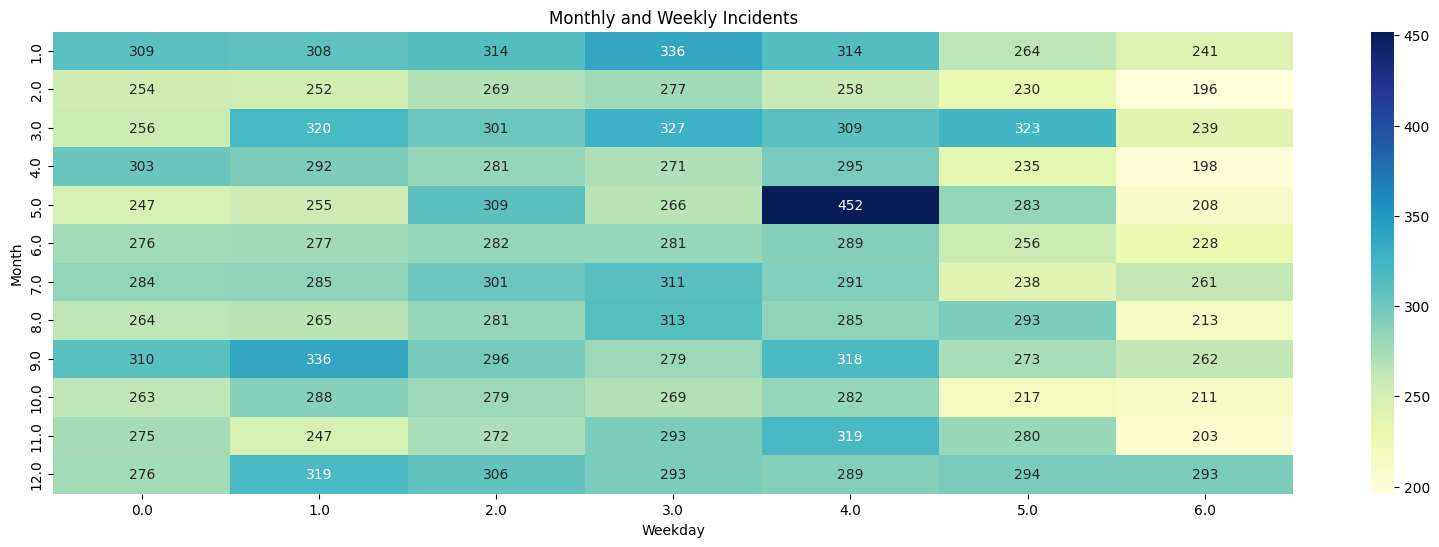

In [ ]:
date = pd.to_datetime(database['date'], errors='coerce') # convertiamo la colonna date in formato datetime
weekday = date.dt.weekday   # creazione della colonna per settimana
month = date.dt.month  # creazione della colonna per mese
monthly_weekly_incidents = database.groupby([month, weekday]).size().unstack(fill_value=0)
plt.figure(figsize=(20, 6))
sns.heatmap(monthly_weekly_incidents, cmap='YlGnBu', annot=True, fmt='g')
plt.xlabel('Weekday')
plt.ylabel('Month')
plt.title('Monthly and Weekly Incidents')
plt.show()



**INCIDENTI DOPO 11 SETTEMBRE 2001** - *Quanti incidenti si sono verificati dopo l'11 Settembre 2001 e in quali paesi?*

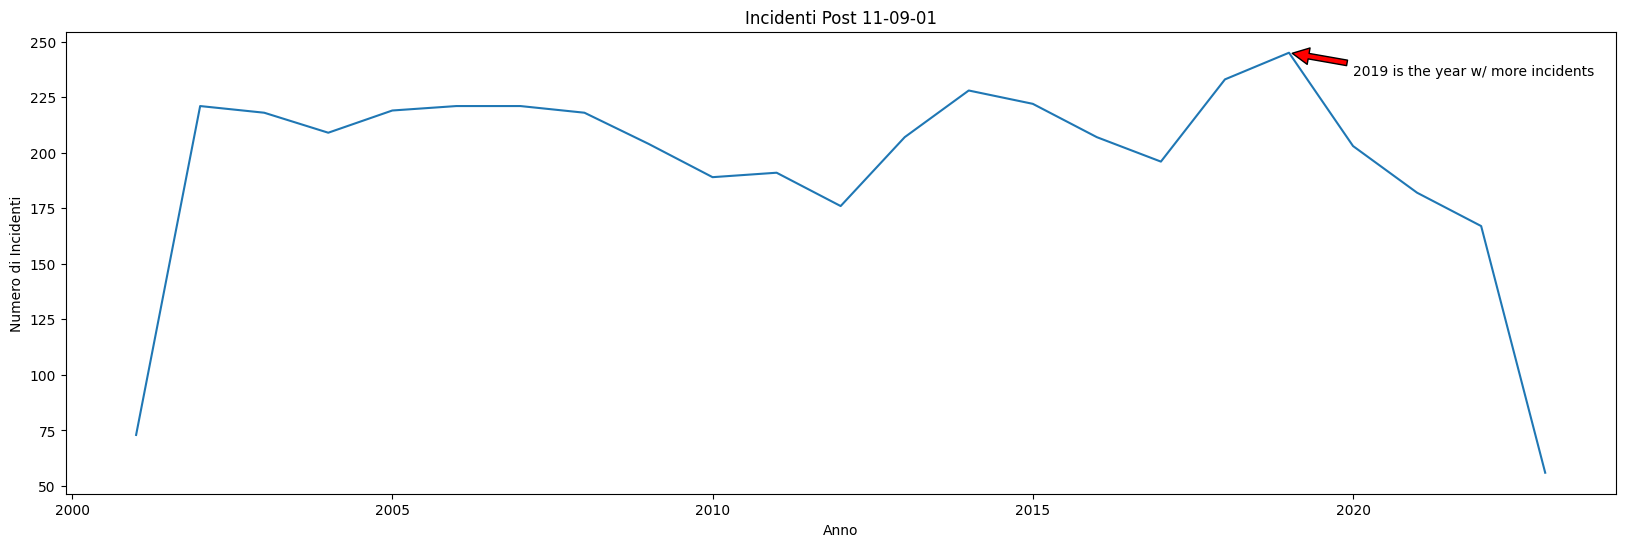

In [ ]:
# Convertiamo la colonna 'date' nel database in formato datetime
database['date'] = pd.to_datetime(database['date'], errors='coerce')

# Definiamo la data dell'attacco dell'11 settembre
tweens_tower_attack = pd.to_datetime('2001-09-11')

# Filtriamo gli incidenti che si sono verificati dopo l'11 settembre
incident_post_tweens_tower_attack = database[database['date'] > tweens_tower_attack]

# Contiamo il numero di incidenti per anno successivi all'11 settembre
incident_per_year = incident_post_tweens_tower_attack['date'].dt.year.value_counts().sort_index()

# Otteniamo l'anno con il più alto numero di incidenti
max_year = incident_per_year.idxmax()
max_incidents = incident_per_year.max()

# Tracciamo il grafico del numero di incidenti per anno
plt.figure(figsize=(20, 6))
plt.plot(incident_per_year.index, incident_per_year.values)
plt.xlabel('Anno')
plt.ylabel('Numero di Incidenti')
plt.title('Incidenti Post 11-09-01')
plt.annotate("2019 is the year w/ more incidents", xy=(max_year,max_incidents), xytext=(max_year+1,max_incidents-10), arrowprops=dict(facecolor="red", shrink=0.05))
plt.show()


**ANALISI DEGLI INCIDENTI PER CATEGORIE** -*Quali sono le categorie di incidenti più diffuse?*

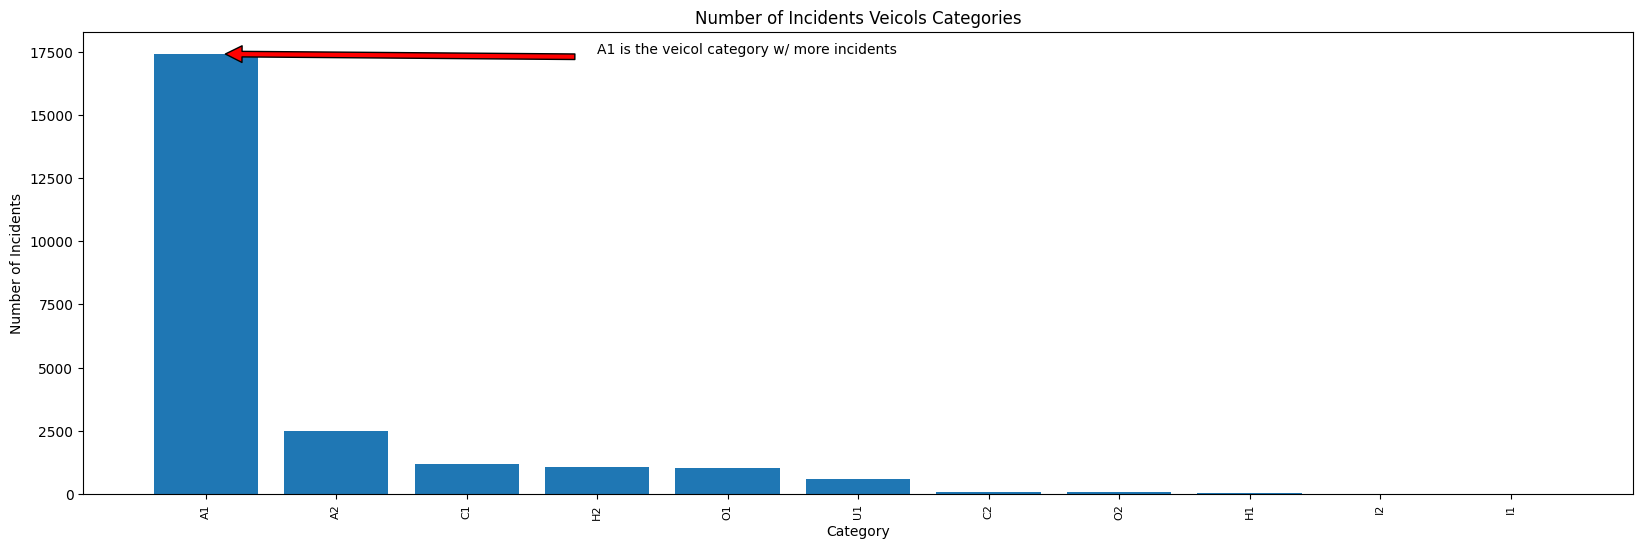

In [ ]:
incidents_categories = database['cat'].value_counts().head(70)

max_incidents_categories = incidents_categories.idxmax() # otteniamo la categoria con il più alto numero di incidenti (però in questo caso è una stringa invece a noi serve la coordinata)
max_incidents_categories_index = incidents_categories.index.get_loc(max_incidents_categories) # otteniamo l'indice della categoria con il più alto numero di incidenti
max_incidents = incidents_categories.max()

plt.figure(figsize=(20, 6))
plt.bar(incidents_categories.index, incidents_categories.values)
plt.xlabel('Category')
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents Veicols Categories')
plt.annotate("A1 is the veicol category w/ more incidents", xy=(max_incidents_categories_index,max_incidents), xytext=(max_incidents_categories_index+3,max_incidents-3), arrowprops=dict(facecolor="red", shrink=0.05))
plt.xticks(rotation=90, fontsize=8)
plt.show()




**CARTOGRAMMA DEI PAESI CON PIU' INCIDENTI** - *Come sarebbe un cartogramma dei paesi suddivisi per disastri aerei?*

/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:265: UserWarning: More than one layer found in '110m_cultural.zip': 'ne_110m_admin_0_countries' (default), 'ne_110m_admin_0_countries_lakes', 'ne_110m_populated_places', 'ne_110m_admin_1_states_provinces_lakes', 'ne_110m_admin_0_scale_rank', 'ne_110m_admin_1_states_provinces_lines', 'ne_110m_admin_0_boundary_lines_land', 'ne_110m_populated_places_simple', 'ne_110m_admin_0_pacific_groupings', 'ne_110m_admin_0_map_units', 'ne_110m_admin_1_states_provinces', 'ne_110m_admin_0_sovereignty', 'ne_110m_admin_1_states_provinces_scale_rank', 'ne_110m_admin_0_tiny_countries'. Specify layer parameter to avoid this warning.
  result = read_func(


<Figure size 1500x1000 with 0 Axes>

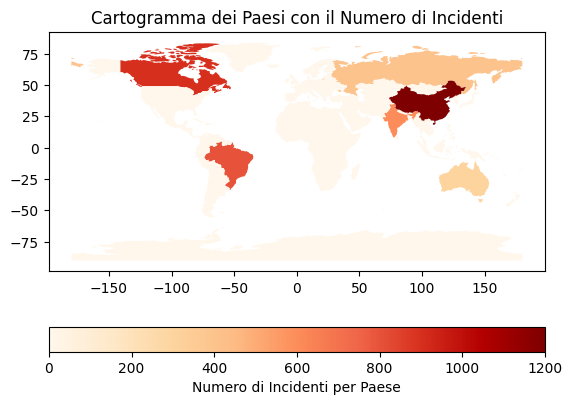

In [ ]:

import requests
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Dati sugli incidenti per paese
data = {
    'country': ['United States', 'Brazil', 'Russia', 'China', 'India', 'Australia', 'Canada'],
    'incidents': [1500, 800, 400, 1200, 600, 300, 900]
}
df = pd.DataFrame(data)

# Raggruppa i dati per paese
incidents_by_country = df.groupby('country').sum().reset_index()

# Scarica il file zip da GitHub
url = 'https://github.com/MarcoRago97/Repository/raw/main/progetto%20disastri%20aerei/110m_cultural.zip'
response = requests.get(url)
with open('110m_cultural.zip', 'wb') as file:
    file.write(response.content)

# Carica il shapefile dal file scaricato
world = gpd.read_file('zip://110m_cultural.zip')

# Unisci i dati sugli incidenti con il DataFrame del mondo
world = world.merge(incidents_by_country, how='left', left_on='NAME', right_on='country')
world['incidents'] = world['incidents'].fillna(0)  # Sostituisci NaN con 0 incidenti

# Creazione del cartogramma
plt.figure(figsize=(15, 10))
world.plot(column='incidents', cmap='OrRd', legend=True,
           legend_kwds={'label': "Numero di Incidenti per Paese", 'orientation': "horizontal"})
plt.title('Cartogramma dei Paesi con il Numero di Incidenti')
plt.show()
